<a href="https://colab.research.google.com/github/BahodirML/AI_Projects/blob/main/3_OR_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import fastai
import torch
import pandas as pd
from fastai.vision.all import *

In [6]:
#path
path = untar_data(URLs.MNIST_SAMPLE)


threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [7]:
im3_sample = threes[1]
im3 = Image.open(im3_sample)
im3

In [8]:
im7_sample = sevens[1]
im7 = Image.open(im7_sample)
im7

In [9]:
array(im3)[4:22, 4:22]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193,
        150,  96,   0,   0,   0],
       [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253,
        253, 233,   0,   0,   0],
       [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253,
        253, 233,   0,   0,   0],
       [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253,
        253, 156,   0,   0,   0],
       [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253,
        245,  74,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245,
        126,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  16,

In [10]:
tensor(im3)[4:22, 4:22]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,
          96,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253,
         233,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253,
         233,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253,
         156,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,
          74,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,
           0,   0,   0,   0],
        [  0,   0, 

In [12]:
from pandas.core.interchange.dataframe_protocol import DataFrame
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:22, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [13]:
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [14]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

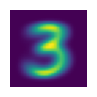

In [19]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

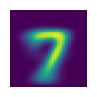

In [20]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

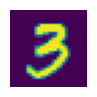

In [21]:
s_3 = stacked_threes[3]
show_image(s_3)

<Axes: >

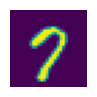

In [23]:
s_7 = stacked_sevens[3]
show_image(s_7)

In [22]:
#MAE
mae = (s_3 - mean3).abs().mean()

#RMSE

rmse = ((s_3 - mean3)**2).mean().sqrt()

mae, rmse

(tensor(0.1154), tensor(0.2064))

In [25]:
#MAE
mae = (s_3 - mean7).abs().mean()

#RMSE

rmse = ((s_3 - mean7)**2).mean().sqrt()

mae, rmse

(tensor(0.1669), tensor(0.3170))